# MEEP Priamy vlnovod

Príklad demonštruje šírenia sa elekromagnetickej energie v dielektrickom vlnovode.


## Konfigurácia



-----------
Initializing structure...
run 0 finished at t = 200.0 (4000 timesteps)


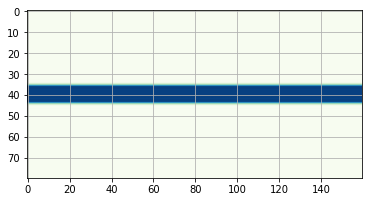

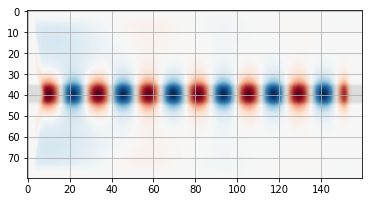

In [19]:
%reset -f 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import meep as mp

# From the Meep tutorial: plotting permittivity and fields of a straight waveguide




cell = mp.Vector3(16,8,0)

geometry = [mp.Block(mp.Vector3(mp.inf,1.0,0),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))]

sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center=mp.Vector3(-7,0))]

pml_layers = [mp.PML(1.0)]

resolution = 10

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

sim.run(until=200)



eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), cmap = 'GnBu', interpolation='spline36') #, cmap='binary')
#plt.axis('off')
plt.grid()
plt.show()

ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
#plt.axis('off')
plt.grid()
plt.show()